In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.amazon.com/')
time.sleep(3)

In [5]:
search = driver.find_element_by_css_selector('#twotabsearchtextbox')

In [6]:
search.send_keys('coffee beans')
search.send_keys(Keys.ENTER)
time.sleep(3)

In [7]:
img = driver.find_elements_by_css_selector('img.s-image')

In [ ]:
len(img)

In [ ]:
len(score), len(review)

In [ ]:
title = driver.find_elements_by_css_selector('#productTitle')
len(title)

In [ ]:
for i in review_head:
    review_head = driver.find_elements_by_css_selector('a.a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold > span')
    review_head_list.append(i.text)

In [ ]:
title = driver.find_element_by_css_selector('#productTitle')
title.text
product = title.text
product

In [ ]:
for i in review_head:
    print(i.text)

In [8]:
review_head_list = []
review_list = []
title_list = []

for i in tqdm(range(2, 5)):
    img = driver.find_element_by_css_selector('#search > div.s-desktop-width-max.s-desktop-content.s-opposite-dir.sg-row > div.s-matching-dir.sg-col-16-of-20.sg-col.sg-col-8-of-12.sg-col-12-of-16 > div > span:nth-child(4) > div.s-main-slot.s-result-list.s-search-results.sg-row > div:nth-child({}) > div > div > div > div > div > div > div.s-product-image-container.aok-relative.s-image-overlay-grey.s-text-center.s-padding-left-small.s-padding-right-small.puis-spacing-small.s-height-equalized > span > a > div'.format(i))
    img.click()
    driver.implicitly_wait(2)

    title = driver.find_element_by_css_selector('#productTitle')
    product = title.text
    
    review_head = driver.find_elements_by_css_selector('div.a-profile-content > span')  
    for i in review_head:
        review_head_list.append(i.text)
    time.sleep(1)
    review = driver.find_elements_by_css_selector('div.a-expander-content.reviewText.review-text-content.a-expander-partial-collapse-content > span')
    for i in review:
        review_list.append(i.text)    
        time.sleep(1)
    for i in range(len(review)):
        title_list.append(product)
    driver.back()

C:\Users\82104\AppData\Local\Temp\ipykernel_18344\737069764.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(2, 5)):


  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
review_head_list2 = []
for i in review_head_list:
    if i != "":
        review_head_list2.append(i)

In [10]:
data = {'제품명' : title_list,'리뷰작성자' : review_head_list2, '리뷰내용' : review_list}

In [11]:
amazon = pd.DataFrame(data)
amazon

,제품명,리뷰작성자,리뷰내용
0,"AmazonFresh Colombia Whole Bean Coffee, Medium...",K. A.,"Like a lot of other reviewers, my usual coffee..."
1,"AmazonFresh Colombia Whole Bean Coffee, Medium...",I Spend Too Much Here,I think the only real draw to this is that it ...
2,"AmazonFresh Colombia Whole Bean Coffee, Medium...",Deliza Nieves,I look forward to drinking coffee every mornin...
3,"AmazonFresh Colombia Whole Bean Coffee, Medium...",Addie,I've been buying eight o'clock Columbian roast...
4,"AmazonFresh Colombia Whole Bean Coffee, Medium...",Kathy Smith,When we compare these coffee beans with other ...
5,"AmazonFresh Colombia Whole Bean Coffee, Medium...",Gerald Wilson,"This is very flavorful delicious coffee, It's ..."
6,"AmazonFresh Colombia Whole Bean Coffee, Medium...",Jason Harris,"I'm normally a regular coffee guy, I've been g..."
7,"AmazonFresh Colombia Whole Bean Coffee, Medium...","City Girl ""Carol""",My go to Costa Rica coffee beans made a big ju...
8,Death Wish Coffee Valhalla Java Dark Roast Gro...,Kevin G,It’s first round draft pick black and should o...
9,Death Wish Coffee Valhalla Java Dark Roast Gro...,Heather,"I like my coffee dark and strong, it is hard t..."


In [12]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
review_list[0]

"Like a lot of other reviewers, my usual coffee had just gotten too expensive, so I decided to give Amazon a try. I bought the Columbia and the Donut Shop varieties. Both are pretty good. Not the best coffee I've ever had, but good flavor, especially considering the price. I think both taste better than Whole Foods 365 coffee (but not better than Whole Food's Allegro line), Target's in house brand, and Trader Joe's basic whole bean coffee.\n\nLike some others noted, it appears the roasting is inconsistent. The donut shop description indicates it's a medium-light roast and the Columbia is a medium roast, but the bag of donut shop I received was darker than the Columbia. If you're particular about your roast, this may not be the coffee for you. However, it's not a deal breaker for me, so I plan on purchasing again."

In [14]:
review_list_nltk = ''
for i in review_list:
    review_list_nltk = review_list_nltk + i

In [15]:
review_list_nltk

"Like a lot of other reviewers, my usual coffee had just gotten too expensive, so I decided to give Amazon a try. I bought the Columbia and the Donut Shop varieties. Both are pretty good. Not the best coffee I've ever had, but good flavor, especially considering the price. I think both taste better than Whole Foods 365 coffee (but not better than Whole Food's Allegro line), Target's in house brand, and Trader Joe's basic whole bean coffee.\n\nLike some others noted, it appears the roasting is inconsistent. The donut shop description indicates it's a medium-light roast and the Columbia is a medium roast, but the bag of donut shop I received was darker than the Columbia. If you're particular about your roast, this may not be the coffee for you. However, it's not a deal breaker for me, so I plan on purchasing again.I think the only real draw to this is that it is a 2LB bag for a fairly low price delivered to your door. This doesn't taste like a medium roast. Nor does it look it. More on t

In [16]:
nltk.corpus.stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

In [17]:
stopwords = ['i', 'be','see','lol.i','see','beans.i',
            'have','want','joe','look','bit','continue','winner.this',
            '”','t','bulletproof','say','“','do','me.i',]

In [18]:
def extract_tags_english(string):
    word_list = []
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
       
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords: #if word not in stopwords:
                word_list.append(word)

    return word_list

In [19]:
review_list_nltk_update = extract_tags_english(review_list_nltk)
review_list_nltk_update

['lot',
 'coffee',
 'give',
 'try',
 'columbia',
 'donut',
 'shop',
 'coffee',
 'flavor',
 'price',
 'taste',
 'coffee',
 'food',
 'line',
 'target',
 'house',
 'brand',
 'trader',
 'bean',
 'coffee',
 'roasting',
 'donut',
 'shop',
 'description',
 'roast',
 'columbia',
 'medium',
 'roast',
 'bag',
 'donut',
 'shop',
 'darker',
 'columbia',
 'roast',
 'coffee',
 'deal',
 'breaker',
 'plan',
 'think',
 'draw',
 'bag',
 'price',
 'door',
 'taste',
 'medium',
 'roast',
 'dark',
 'flavor',
 'kind',
 'shock',
 'cup',
 'medium',
 'roast',
 'intelligentsia',
 'tasting',
 'finish',
 'coffee',
 'coffee',
 'finish',
 'side',
 'flavor',
 'palate',
 'coffee',
 'finish',
 'bag',
 'try',
 'roast',
 'amazon',
 'maybe',
 'roast',
 'medium',
 'coffee',
 'morning',
 'grind',
 'brew',
 'coffee',
 'maker',
 'roast',
 'while',
 'dry',
 'amazon',
 'brand',
 'compare',
 'save',
 'money',
 'choice',
 'coffee',
 'price',
 'coffee',
 'beans.this',
 'coffee',
 'bean',
 'grinder',
 'cup',
 'coffee',
 'coffee',
 

In [20]:
count = Counter(review_list_nltk_update)
count

Counter({'lot': 1,
         'coffee': 40,
         'give': 2,
         'try': 5,
         'columbia': 3,
         'donut': 3,
         'shop': 4,
         'flavor': 13,
         'price': 8,
         'taste': 6,
         'food': 1,
         'line': 1,
         'target': 1,
         'house': 1,
         'brand': 5,
         'trader': 1,
         'bean': 5,
         'roasting': 1,
         'description': 1,
         'roast': 15,
         'medium': 7,
         'bag': 11,
         'darker': 3,
         'deal': 1,
         'breaker': 1,
         'plan': 1,
         'think': 1,
         'draw': 1,
         'door': 3,
         'dark': 3,
         'kind': 1,
         'shock': 1,
         'cup': 4,
         'intelligentsia': 1,
         'tasting': 1,
         'finish': 3,
         'side': 2,
         'palate': 1,
         'amazon': 6,
         'maybe': 1,
         'morning': 1,
         'grind': 2,
         'brew': 2,
         'maker': 1,
         'while': 1,
         'dry': 1,
         'compare

In [21]:
count.most_common(10)

[('coffee', 40),
 ('roast', 15),
 ('flavor', 13),
 ('bag', 11),
 ('price', 8),
 ('medium', 7),
 ('taste', 6),
 ('amazon', 6),
 ('try', 5),
 ('brand', 5)]

In [22]:
from PIL import Image
import numpy as np

In [23]:
mask_image = np.array(Image.open(r'C:\Users\82104\Desktop\호랑이.jpg'))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                     width = 700,height=700
                      ,background_color='black',colormap = 'summer'
                      ,mask = mask_image
                      ,random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

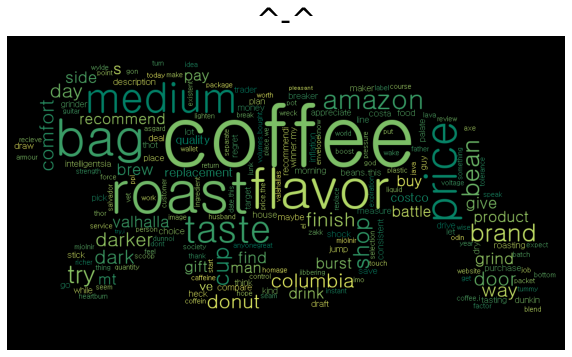

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("^-^", size = 30)
plt.show